In [3]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [5]:
%display latex
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

In [6]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [7]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [8]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [9]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [10]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [11]:
system = System(R, R.gens(), y0, y); system

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [12]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(system,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=150,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [13]:
reach = system.reach(
    5, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=150,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7


var_id_x = 3
var_id_y = 5


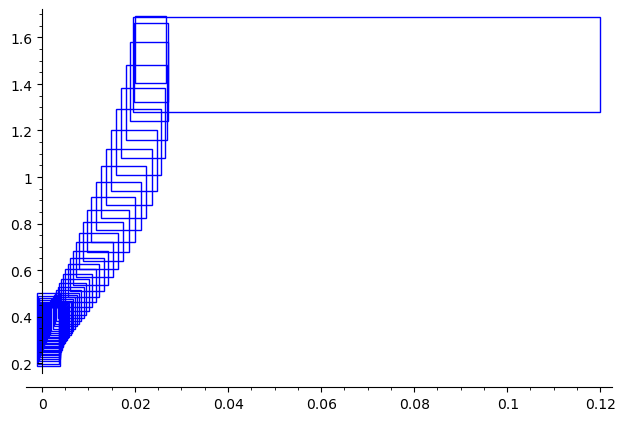

In [14]:
p = reach.sage_interval_plot("x4", "x6")
p.set_aspect_ratio(1/20)
p

In [15]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [16]:
Q = Atomic(var("x4") < 1/125); Q

Atomic(x4 < (1/125))

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.72 seconds
roots = [[0.73107619167936432 .. 0.94185785148114521]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.73107619167936432 .. 0.94185785148114521]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 2.72 seconds


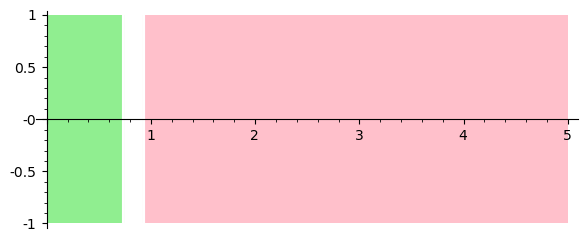

In [17]:
sigP = P.signal(reach, symbolic_composition=True)
sigP.plot()

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.88 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 2.88 seconds


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


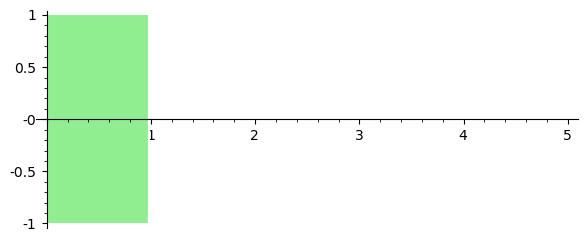

In [18]:
maskP = P.signal(reach).to_mask_and()
maskP.plot()

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.83 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 2.83 seconds


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


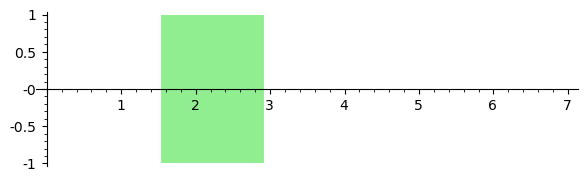

In [19]:
maskP = P.signal(reach).to_mask_and().P(RIF(1.5, 2))
maskP.plot()

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.97 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 2.97 seconds


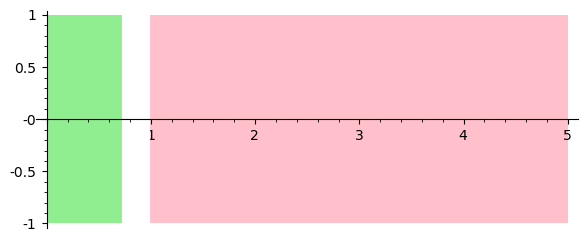

In [20]:
P.signal(reach).plot()

PolyObserver(-x4 + 0.00800000000000000?, <flowstar.reachability.Reach object at 0x7f1986482040>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.73 seconds
roots = [[1.5075166325657605 .. 2.4930000000000577]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x4 < (1/125): 1 items in 3.73 seconds


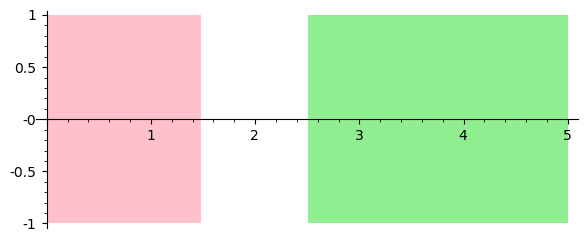

In [21]:
Q.signal(reach).plot()

PolyObserver(-x4 + 0.00800000000000000?, <flowstar.reachability.Reach object at 0x7f1986482040>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.82 seconds
roots = [[1.5075166325657605 .. 2.4930000000000577]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x4 < (1/125): 1 items in 3.82 seconds


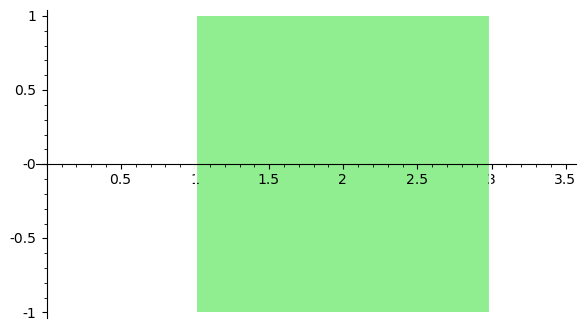

In [22]:
Q.signal(reach).G(RIF(1.5, 2)).plot()

PolyObserver(-x4 + 0.00800000000000000?, <flowstar.reachability.Reach object at 0x7f1986482040>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 7.0000000000000000], [[1.5000000000000000 .. 2.9660000000000011]]))
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.98 seconds
roots = [[1.5075166325657605 .. 2.4930000000000577]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
seg_domain = [1.5000000000000000 .. 2.9660000000000011]
roots = [[1.5075166325657605 .. 2.4930000000000577]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x4 < (1/125): 1 items in 1.98 seconds


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


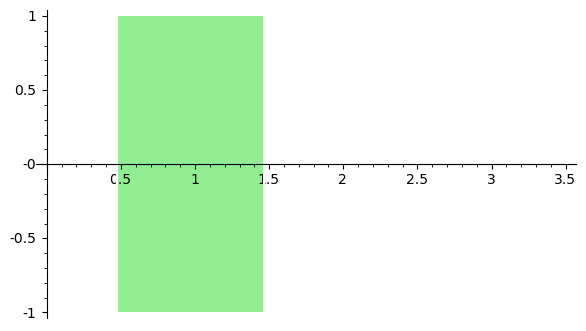

In [23]:
Q.signal(reach, mask=maskP).F(RIF(1.5, 2)).plot()

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 3.19 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 3.19 seconds


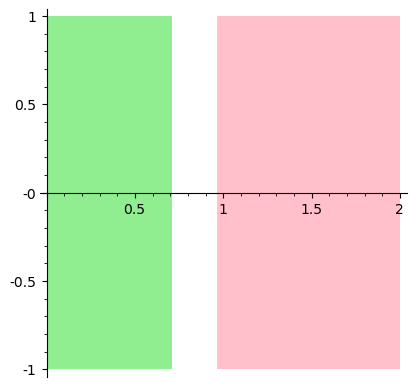

In [24]:
P.signal(reach).to_domain(RIF(0, 2)).plot()

PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f1986482040>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.96 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.00 seconds
Monitoring atomic x6 > 1: 1 items in 2.96 seconds
PolyObserver(-x4 + 0.00800000000000000?, <flowstar.reachability.Reach object at 0x7f1986482040>, -x2*x6 + 100*x4, symbolic_composit

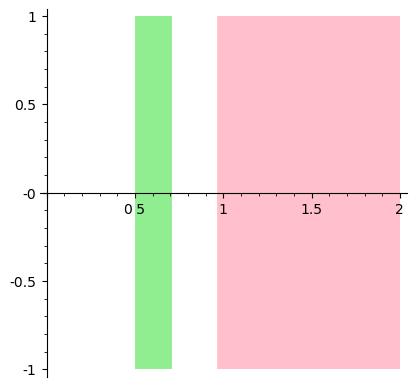

In [25]:
(P.signal(reach) & Q.signal(reach).F(RIF(1.5, 2))).to_domain(RIF(0, 2)).plot()

In [26]:
def no_op(interval, x):
    return x

In [27]:
@interact
def _(t=slider(0, 4, step_size=1/10, default=1.5),
      k=slider(0, 4, step_size=1/10, default=0.5),
      epsilon=slider(0, 1/100, step_size=1/1000, default=1/125),
      operator=selector({'F': F, 'G': G, 'None': no_op}),
      auto_update=False):
    with suppress_stdout():
        operator(RIF(t, t+k), Atomic(var("x4") > epsilon)).signal(reach).plot().show()

Manual interactive function <function _ at 0x7f197c1d0dc0> with 4 widgets
  t: SelectionSlider(description='t'…

In [28]:
from time import perf_counter

In [29]:
@interact
def _(t=slider(0, 4, step_size=1/10, default=1.5),
      k=slider(0, 4, step_size=1/10, default=0.5),
      epsilon=slider(0, 1/100, step_size=1/1000, default=1/125),
      operator=selector({'F': F,'G': G, 'None': no_op}),
      symbolic_composition=checkbox(False),
      use_masks=checkbox(False),
      auto_update=False):
    with suppress_stdout():
        t0 = perf_counter()
        (P & operator(RIF(t, t+k), Atomic(var("x4") > epsilon))).signal(reach, symbolic_composition=symbolic_composition, use_masks=use_masks).plot().show()
        t1 = perf_counter()
    print(f"Monitored in {t1 - t0} sec")

Manual interactive function <function _ at 0x7f197c0d11f0> with 6 widgets
  t: SelectionSlider(description='t'…

In [25]:
import operator

In [26]:
@interact
def _(t=slider(0, 4, step_size=1/10, default=1.5),
      k=slider(0, 4, step_size=1/10, default=0.5),
      tx6=slider(0, 2, step_size=1/10, default=1),
      epsilon=slider(0, 1/100, step_size=1/1000, default=1/125),
      temporal_operator=selector({'F': F, 'G': G, 'None': no_op}),
      logical_operator=selector({'and': operator.and_, 'or': operator.or_}),
      symbolic_composition=checkbox(False),
      use_masks=checkbox(False),
      auto_update=False):
    kwargs = dict(symbolic_composition=symbolic_composition, use_masks=use_masks)
    with suppress_stdout():
        t0 = perf_counter()
        P = Atomic(var("x6") > tx6)
        sigP = P.signal(reach, **kwargs)
        t1 = perf_counter()
        sigP.plot().show()
    print(f"Monitored P in {t1 - t0} sec")
    with suppress_stdout():
        t0 = perf_counter()
        Q = temporal_operator(RIF(t, t+k), Atomic(var("x4") > epsilon))
        sigQ = Q.signal(reach, **kwargs)
        t1 = perf_counter()
        sigQ.plot().show()
    print(f"Monitored Q in {t1 - t0} sec")
    with suppress_stdout():
        t0 = perf_counter()
        sig = logical_operator(P, Q).signal(reach, **kwargs)
        t1 = perf_counter()
        sig.plot().show()
    print(f"Monitored overall prop in {t1 - t0} sec")

Manual interactive function <function _ at 0x7f1e361f0af0> with 8 widgets
  t: SelectionSlider(description='t'…

In [27]:
@interact
def _(t=slider(0, 4, step_size=1/10, default=1.5),
      k=slider(0, 4, step_size=1/10, default=0.5),
      tx6=slider(0, 2, step_size=1/10, default=1),
      epsilon=slider(0, 1/100, step_size=1/1000, default=1/125),
      duration=slider(0, 10, default=5),
      temporal_operator=selector({'F': F, 'G': G, 'None': no_op}),
      logical_operator=selector({'and': operator.and_, 'or': operator.or_}),
      symbolic_composition=checkbox(False),
      use_masks=checkbox(False),
      two_pass_masks=False,
      auto_update=False):
    kwargs = dict(
        symbolic_composition=symbolic_composition,       
        use_masks=use_masks,
        two_pass_masks=two_pass_masks,
    )
    
    def display(sig):
        if duration:
            sig.plot().show()
        else:
            print(repr(sig(0)))
    
    sigs = {}
    times = {}
    
    def monitor(prop):
        try:
            times[prop], sigs[prop] = test_monitoring(prop, duration, **kwargs)
            display(sigs[prop])
            print(f"Monitored {prop} in {times[prop]} sec")
        except:
            import traceback
            traceback.print_last()
    
   
    P = Atomic(var("x6") > tx6)
    monitor(P)
    
    Q = temporal_operator(RIF(t, t+k),
                          Atomic(var("x4") < epsilon))
    monitor(Q)                        
    
    
    monitor(logical_operator(P, Q))
                          
    monitor(logical_operator(Q, P))
    
    return sigs, times

Manual interactive function <function _ at 0x7f1e35f408b0> with 10 widgets
  t: SelectionSlider(description='t…